# ECE 471 Fall 2024 Mini Project 1: Safety Analysis of Autonomous Vehicle

## Imports

In [1]:
import pandas as pd
import scipy.stats as stats
from dtaidistance import dtw

import matplotlib.pyplot as plt
import seaborn as sns

import json
import os

## Task 0 – Collecting simulated data with Carla

The data is collected via **Carla** on the class remote server. The data is stored in *MP1/OOD-Weather/campaign_results/*. We do not know what to do in this jupyter notebook for task 0. To demonstrate that we have successfully run the simulation and collected the data, we read the data in task 1 below and follow the prompts in task 1 that ask for the head of the data to be displayed for one of the weather conditions.

## Task 1 – Getting to know the analysis environment

### 1.1 Importing the *_ctl.csv*, *_cvip.csv*, and *_traj.csv* data for each weather condition

Under the **Clear Night** weather:

In [2]:
df_clear_night_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0914_142932-data_fi_ghost_cutin-single_ctl.csv')  # Read _ctl.csv simulation data under clear night condition
df_clear_night_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0914_142932-data_fi_ghost_cutin-single_cvip.csv')  # Read _cvip.csv simulation data under clear night condition
df_clear_night_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-night_fi_ghost_cutin/routes_fi_route_highway-0914_142932-data_fi_ghost_cutin-single_traj.csv')  # Read _traj.csv simulation data under clear night condition

Under the **Clear Sunset** weather:

In [3]:
df_clear_sunset_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0914_142604-data_fi_ghost_cutin-single_ctl.csv')  # Read _ctl.csv simulation data under clear sunset condition
df_clear_sunset_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0914_142604-data_fi_ghost_cutin-single_cvip.csv') # Read _cvip.csv simulation data under clear sunset condition
df_clear_sunset_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-sunset_fi_ghost_cutin/routes_fi_route_highway-0914_142604-data_fi_ghost_cutin-single_traj.csv') # Read _traj.csv simulation data under clear sunset condition

Under the **Clear Noon** weather:

In [4]:
df_clear_noon_ctl = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0914_142304-data_fi_ghost_cutin-single_ctl.csv') # Read _ctl.csv simulation data under clear noon condition
df_clear_noon_cvip = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0914_142304-data_fi_ghost_cutin-single_cvip.csv') # Read _ctl.csv simulation data under clear noon condition
df_clear_noon_traj = pd.read_csv('campaign_results/route_highway_epoch24_clear-noon_fi_ghost_cutin/routes_fi_route_highway-0914_142304-data_fi_ghost_cutin-single_traj.csv') # Read _ctl.csv simulation data under clear noon condition

Under the **Rain Noon** weather:

In [5]:
df_rain_noon_ctl = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0914_142518-data_fi_ghost_cutin-single_ctl.csv') # Read _ctl.csv simulation data under rain noon condition
df_rain_noon_cvip = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0914_142518-data_fi_ghost_cutin-single_cvip.csv') # Read _cvip.csv simulation data under rain noon condition
df_rain_noon_traj = pd.read_csv('campaign_results/route_highway_epoch24_rain-noon_fi_ghost_cutin/routes_fi_route_highway-0914_142518-data_fi_ghost_cutin-single_traj.csv') # Read _traj.csv simulation data under rain noon condition

Display the first 5 rows of the *_ctl.csv*, *_cvip.csv*, and *_traj.csv* with the **Clear Night** weather condition

For **Clear Night** *_ctl.csv*:

In [6]:
df_clear_night_ctl.head()

,ts,agent_id,throttle,steer,brake
0,10383143,0,0.9,-0.004458,0.0
1,10383144,0,0.9,-0.009343,0.0
2,10383145,0,0.9,-0.010633,0.0
3,10383146,0,0.9,-0.009194,0.0
4,10383147,0,0.9,0.000132,0.0


For **Clear Night** *_cvip.csv*:

In [7]:
df_clear_night_cvip.head()

,ts,agent_id,cvip,cvip_x,cvip_y,cvip_z
0,10383143,0,500.491189,198.767441,-95.832657,-499.819366
1,10383144,0,5.595580,195.567444,-90.832657,0.100000
2,10383145,0,5.592365,195.567444,-90.832657,0.095407
3,10383146,0,5.589578,195.567444,-90.832657,0.084691
4,10383147,0,5.587154,195.567444,-90.832657,0.069311


For **Clear Night** *_traj.csv*:

In [8]:
df_clear_night_traj.head()

,ts,agent_id,x,y,z,v
0,10383143,0,192.362411,-86.26268,0.539326,0.0
1,10383144,0,192.362411,-86.26268,0.491906,0.0
2,10383145,0,192.362411,-86.26268,0.438374,0.0
3,10383146,0,192.362411,-86.26268,0.378732,0.0
4,10383147,0,192.362411,-86.26268,0.312981,0.0


### 1.2 Summarizing some information for each weather condition

To facilitate our following data exploration, we first merge *_ctl.csv*, *_cvip.csv*, and *_traj.csv* horizontally for each weather condition

In [9]:
df_clear_night = pd.concat([df_clear_night_ctl, df_clear_night_cvip.drop(['ts', 'agent_id'], axis=1), df_clear_night_traj.drop(['ts', 'agent_id'], axis=1)], axis=1)
df_clear_sunset = pd.concat([df_clear_sunset_ctl, df_clear_sunset_cvip.drop(['ts', 'agent_id'], axis=1), df_clear_sunset_traj.drop(['ts', 'agent_id'], axis=1)], axis=1)
df_clear_noon = pd.concat([df_clear_noon_ctl, df_clear_noon_cvip.drop(['ts', 'agent_id'], axis=1), df_clear_noon_traj.drop(['ts', 'agent_id'], axis=1)], axis=1)
df_rain_noon = pd.concat([df_rain_noon_ctl, df_rain_noon_cvip.drop(['ts', 'agent_id'], axis=1), df_rain_noon_traj.drop(['ts', 'agent_id'], axis=1)], axis=1)

In [10]:
df_clear_night.head()

,ts,agent_id,throttle,steer,brake,cvip,cvip_x,cvip_y,cvip_z,x,y,z,v
0,10383143,0,0.9,-0.004458,0.0,500.491189,198.767441,-95.832657,-499.819366,192.362411,-86.26268,0.539326,0.0
1,10383144,0,0.9,-0.009343,0.0,5.595580,195.567444,-90.832657,0.100000,192.362411,-86.26268,0.491906,0.0
2,10383145,0,0.9,-0.010633,0.0,5.592365,195.567444,-90.832657,0.095407,192.362411,-86.26268,0.438374,0.0
3,10383146,0,0.9,-0.009194,0.0,5.589578,195.567444,-90.832657,0.084691,192.362411,-86.26268,0.378732,0.0
4,10383147,0,0.9,0.000132,0.0,5.587154,195.567444,-90.832657,0.069311,192.362411,-86.26268,0.312981,0.0


#### a. The duration of each scene

For **Clear Night** condition:

In [11]:
clear_night_duration = df_clear_night['ts'].iloc[-1] - df_clear_night['ts'].iloc[0] # Get the duration of the simulation by subtracting the first row timestamp from the last row timestamp
print(f"The duration for clear night is: {clear_night_duration} (in frames)")

The duration for clear night is: 811 (in frames)


For **Clear Sunset** condition:

In [12]:
clear_sunset_duration = df_clear_sunset['ts'].iloc[-1] - df_clear_sunset['ts'].iloc[0] # Get the duration of the simulation by subtracting the first row timestamp from the last row timestamp
print(f"The duration for clear sunset is: {clear_sunset_duration} (in frames)")

The duration for clear sunset is: 756 (in frames)


For **Clear Noon** condition:

In [13]:
clear_noon_duration = df_clear_noon['ts'].iloc[-1] - df_clear_noon['ts'].iloc[0] # Get the duration of the simulation by subtracting the first row timestamp from the last row timestamp
print(f"The duration for clear noon is: {clear_noon_duration} (in frames)")

The duration for clear noon is: 752 (in frames)


For **Rain Noon** condition:

In [14]:
rain_noon_duration = df_rain_noon['ts'].iloc[-1] - df_rain_noon['ts'].iloc[0] # Get the duration of the simulation by subtracting the first row timestamp from the last row timestamp
print(f"The duration for rain noon is: {rain_noon_duration} (in frames)")

The duration for rain noon is: 400 (in frames)


#### b. Mean and standard deviation of the values of the features (*throttle*, *steer*, *brake*, *cvip*, *x*, *y*, *v*).

In [15]:
clear_night_mean = round(df_clear_night[['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']].mean(), 3) # Calculate the mean of the 'throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v' columns and round to 3 decimal places
clear_night_std = round(df_clear_night[['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']].std(), 3) # Calculate the standard deviation of the 'throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v' columns and round to 3 decimal places
clear_night_stat = clear_night_mean.astype(str) + ' (' + clear_night_std.astype(str) + ')'  # Concatenate the mean and standard deviation values as a string, the values inside the parenthesis are stds.

clear_sunset_mean = round(df_clear_sunset[['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']].mean(), 3) # Calculate the mean of the 'throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v' columns and round to 3 decimal places
clear_sunset_std = round(df_clear_sunset[['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']].std(), 3) # Calculate the standard deviation of the 'throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v' columns and round to 3 decimal places
clear_sunset_stat = clear_sunset_mean.astype(str) + ' (' + clear_sunset_std.astype(str) + ')'  # Concatenate the mean and standard deviation values as a string, the values inside the parenthesis are stds.

clear_noon_mean = round(df_clear_noon[['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']].mean(), 3) # Calculate the mean of the 'throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v' columns and round to 3 decimal places
clear_noon_std = round(df_clear_noon[['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']].std(), 3) # Calculate the standard deviation of the 'throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v' columns and round to 3 decimal places
clear_noon_stat = clear_noon_mean.astype(str) + ' (' + clear_noon_std.astype(str) + ')'  # Concatenate the mean and standard deviation values as a string, the values inside the parenthesis are stds.

rain_noon_mean = round(df_rain_noon[['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']].mean(), 3) # Calculate the mean of the 'throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v' columns and round to 3 decimal places
rain_noon_std = round(df_rain_noon[['throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v']].std(), 3) # Calculate the standard deviation of the 'throttle', 'steer', 'brake', 'cvip', 'x', 'y', 'v' columns and round to 3 decimal places
rain_noon_stat = rain_noon_mean.astype(str) + ' (' + rain_noon_std.astype(str) + ')'  # Concatenate the mean and standard deviation values as a string, the values inside the parenthesis are stds.

combined_stat = pd.DataFrame({
    'clear-night': clear_night_stat,
    'clear-sunset': clear_sunset_stat,
    'clear-noon': clear_noon_stat,
    'rain-noon': rain_noon_stat
}) # Create a DataFrame with the calculated statistics
combined_stat

,clear-night,clear-sunset,clear-noon,rain-noon
throttle,0.621 (0.339),0.61 (0.281),0.61 (0.282),0.648 (0.275)
steer,0.006 (0.047),0.0 (0.005),0.001 (0.005),-0.001 (0.003)
brake,0.087 (0.283),0.057 (0.232),0.061 (0.24),0.04 (0.196)
cvip,28.822 (29.404),20.045 (24.631),19.523 (24.269),7.055 (24.735)
x,191.254 (1.183),192.946 (0.401),192.92 (0.403),192.631 (0.252)
y,-32.476 (39.59),-31.209 (40.417),-31.334 (40.564),-63.99 (21.056)
v,6.432 (2.992),6.885 (3.314),6.929 (3.283),6.332 (3.866)


### 1.3 Visualizing the campaign results of the *ghost_cutin* scene for each weather condition.

Loading datasets and weathers list

In [16]:
dfs = [df_clear_night, df_clear_sunset, df_clear_noon, df_rain_noon]
weathers = ['Clear-Night', 'Clear-Sunset', 'Clear-Noon', 'Rain-Noon']

For Feature **throttle**:

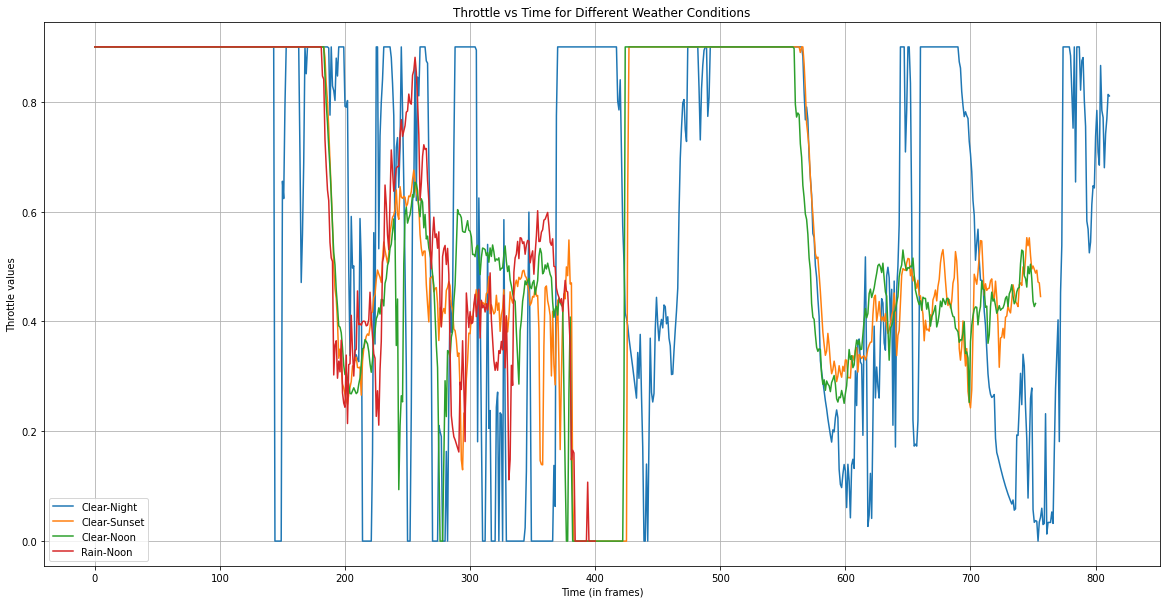

In [17]:
feature = 'throttle'

plt.figure(figsize=(20, 10)) # Set the figure size
    
for df, weather in zip(dfs, weathers): # Iterate over the DataFrames and weather conditions
    plt.plot(df.index, df[feature], label=weather) # Plot the feature vs time for different weather conditions

plt.xlabel('Time (in frames)') # Set the x-axis label
plt.ylabel(f'{feature.capitalize()} values') # Set the y-axis label
plt.title(f'{feature.capitalize()} vs Time for Different Weather Conditions') # Set the title of the plot
plt.legend() # Show the legend
plt.grid(True) # Show the grid
plt.show() # Show the plot

For Feature **steer**:

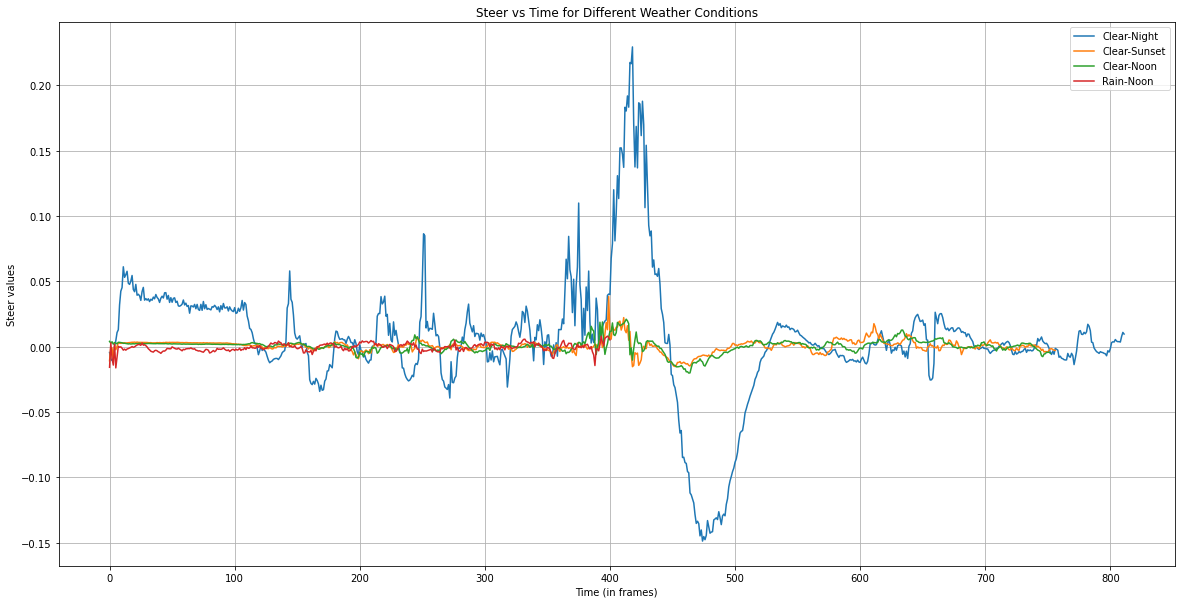

In [18]:
feature = 'steer'

plt.figure(figsize=(20, 10)) # Set the figure size
    
for df, weather in zip(dfs, weathers): # Iterate over the DataFrames and weather conditions
    plt.plot(df.index, df[feature], label=weather) # Plot the feature vs time for different weather conditions

plt.xlabel('Time (in frames)') # Set the x-axis label
plt.ylabel(f'{feature.capitalize()} values') # Set the y-axis label
plt.title(f'{feature.capitalize()} vs Time for Different Weather Conditions') # Set the title of the plot
plt.legend() # Show the legend
plt.grid(True) # Show the grid
plt.show() # Show the plot

For Feature **brake**:

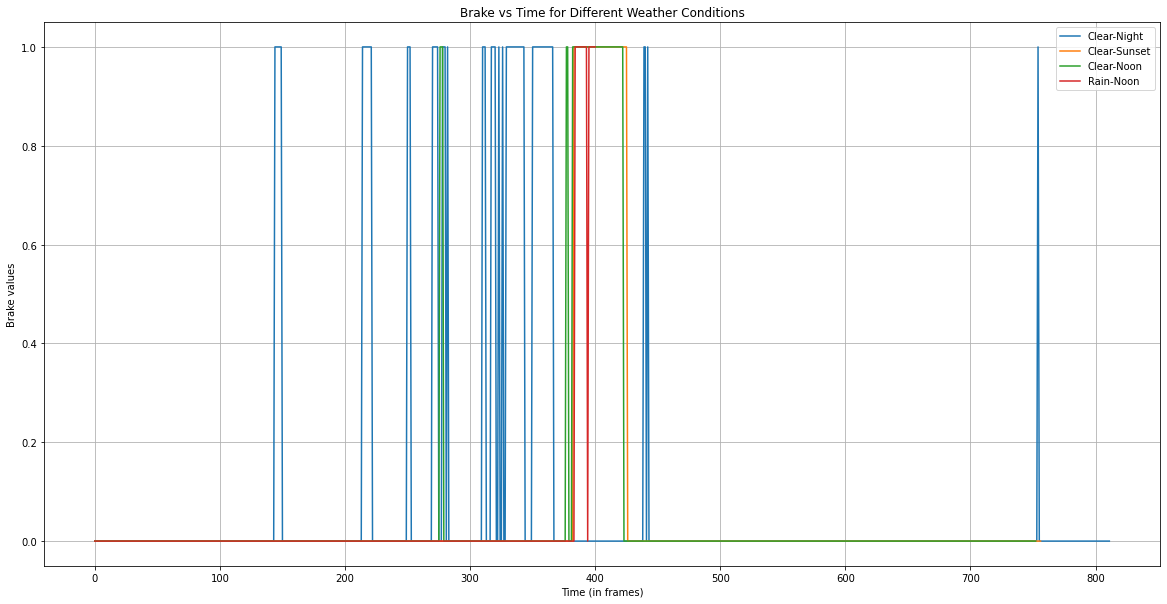

In [19]:
feature = 'brake'

plt.figure(figsize=(20, 10)) # Set the figure size
    
for df, weather in zip(dfs, weathers): # Iterate over the DataFrames and weather conditions
    plt.plot(df.index, df[feature], label=weather) # Plot the feature vs time for different weather conditions

plt.xlabel('Time (in frames)') # Set the x-axis label
plt.ylabel(f'{feature.capitalize()} values') # Set the y-axis label
plt.title(f'{feature.capitalize()} vs Time for Different Weather Conditions') # Set the title of the plot
plt.legend() # Show the legend
plt.grid(True) # Show the grid
plt.show() # Show the plot

For Feature **cvip**:

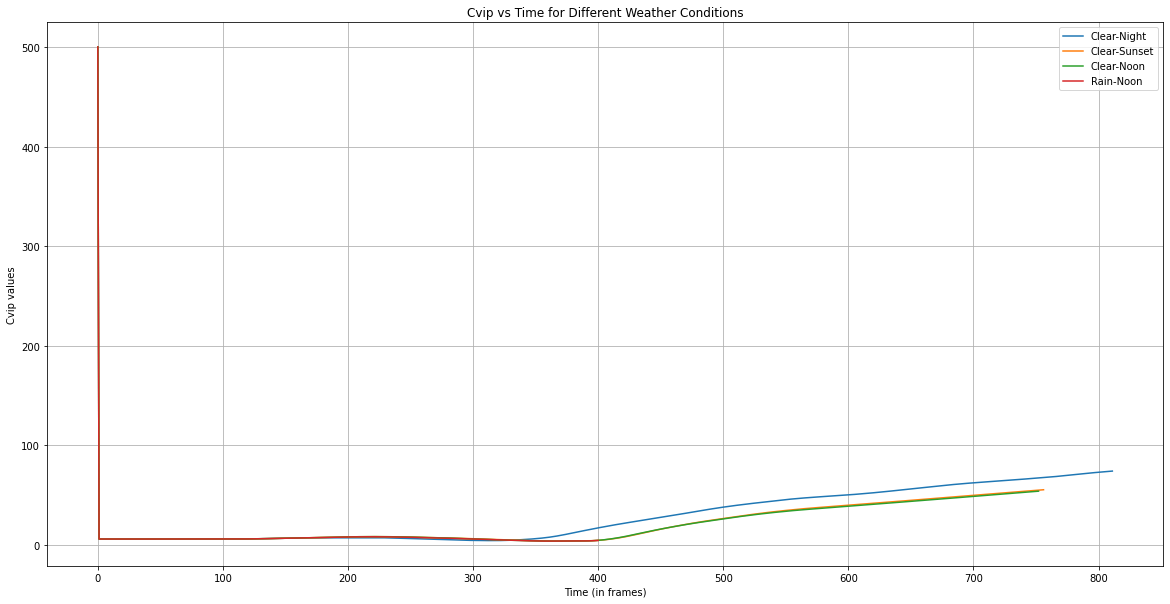

In [20]:
feature = 'cvip'

plt.figure(figsize=(20, 10)) # Set the figure size
    
for df, weather in zip(dfs, weathers): # Iterate over the DataFrames and weather conditions
    plt.plot(df.index, df[feature], label=weather) # Plot the feature vs time for different weather conditions

plt.xlabel('Time (in frames)') # Set the x-axis label
plt.ylabel(f'{feature.capitalize()} values') # Set the y-axis label
plt.title(f'{feature.capitalize()} vs Time for Different Weather Conditions') # Set the title of the plot
plt.legend() # Show the legend
plt.grid(True) # Show the grid
plt.show() # Show the plot

For Feature **x**:

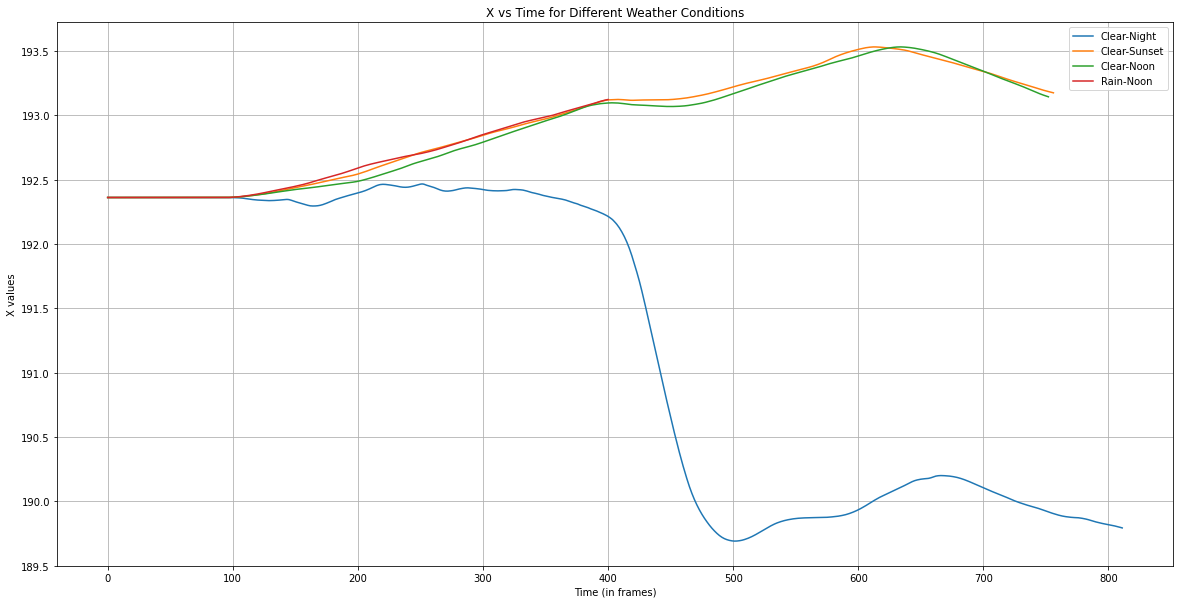

In [21]:
feature = 'x'

plt.figure(figsize=(20, 10)) # Set the figure size
    
for df, weather in zip(dfs, weathers): # Iterate over the DataFrames and weather conditions
    plt.plot(df.index, df[feature], label=weather) # Plot the feature vs time for different weather conditions

plt.xlabel('Time (in frames)') # Set the x-axis label
plt.ylabel(f'{feature.capitalize()} values') # Set the y-axis label
plt.title(f'{feature.capitalize()} vs Time for Different Weather Conditions') # Set the title of the plot
plt.legend() # Show the legend
plt.grid(True) # Show the grid
plt.show() # Show the plot

For Feature **y**:

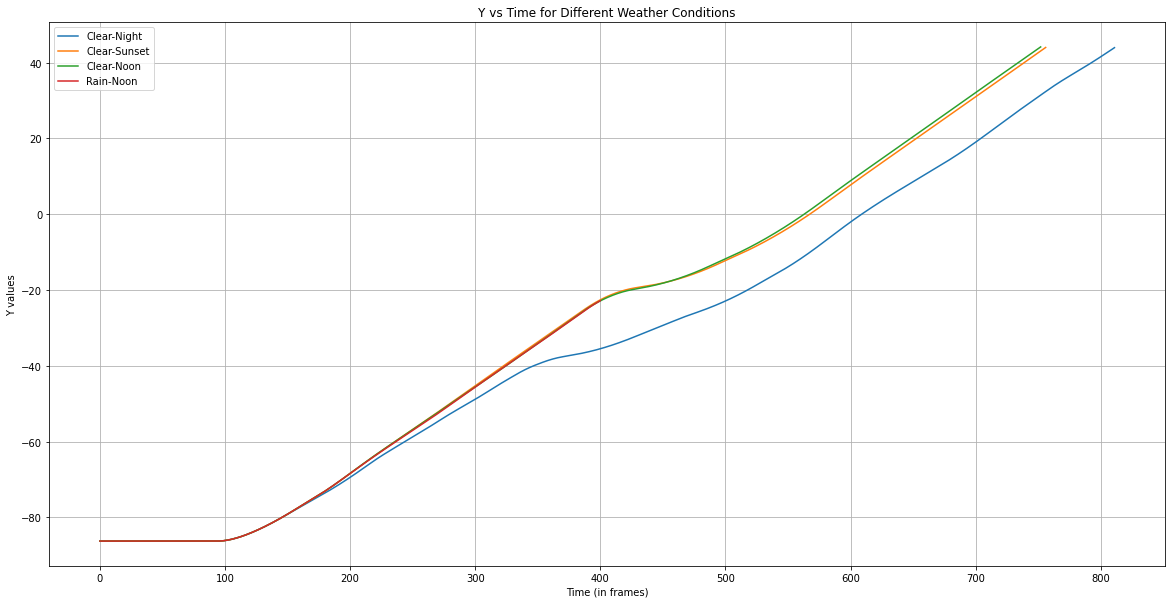

In [22]:
feature = 'y'

plt.figure(figsize=(20, 10)) # Set the figure size
    
for df, weather in zip(dfs, weathers): # Iterate over the DataFrames and weather conditions
    plt.plot(df.index, df[feature], label=weather) # Plot the feature vs time for different weather conditions

plt.xlabel('Time (in frames)') # Set the x-axis label
plt.ylabel(f'{feature.capitalize()} values') # Set the y-axis label
plt.title(f'{feature.capitalize()} vs Time for Different Weather Conditions') # Set the title of the plot
plt.legend() # Show the legend
plt.grid(True) # Show the grid
plt.show() # Show the plot

For Feature **v**:

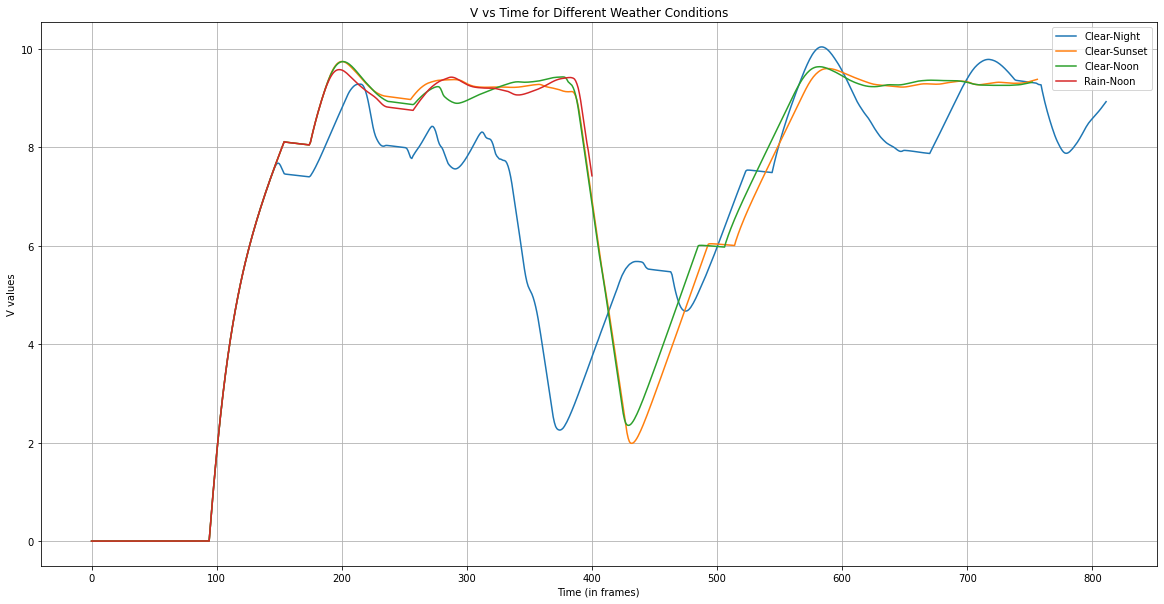

In [23]:
feature = 'v'

plt.figure(figsize=(20, 10)) # Set the figure size
    
for df, weather in zip(dfs, weathers): # Iterate over the DataFrames and weather conditions
    plt.plot(df.index, df[feature], label=weather) # Plot the feature vs time for different weather conditions

plt.xlabel('Time (in frames)') # Set the x-axis label
plt.ylabel(f'{feature.capitalize()} values') # Set the y-axis label
plt.title(f'{feature.capitalize()} vs Time for Different Weather Conditions') # Set the title of the plot
plt.legend() # Show the legend
plt.grid(True) # Show the grid
plt.show() # Show the plot

### 1.4 Post Analysis

**Which of the features do you think will change during an accident? How will the feature(s) change? By looking at the plots you generated in Task 1.3, combined with your reasoning (without looking at ‘route_highway.txt’), which weather condition(s) has an accident?**


From our perspective, we believe the **throttle** and **brake** change drastically during an accident. When an accident happens, the driver is likely to apply the brake and reduce the throttle to minimize damage. As a result, the AV's acceleration would drop sharply. Based on this, we suspect the AV in the Rain Noon weather scenario was involved in an accident. The plots show that toward the end of the timestamp, the brake was applied, and the throttle dropped significantly.

## Task 2 – Analysis of simulated data

### 2.1 Calculate the probability of accident

In [24]:
results_path = "./campaign_results" # Set the path to the campaign results folder

total_counts = 0 # Initialize the total counts
accident_counts = 0 # Initialize the accident counts

for subfolder in os.listdir(results_path): # Iterate over the subfolders in the campaign results folder
    folder_path = os.path.join(results_path, subfolder) # Get the path to the subfolder
    file_path = os.path.join(folder_path, 'route_highway.txt') # Get the path to the route_highway.txt file
    with open(file_path, 'r') as file: # Open the file in read mode
        data = json.load(file) # Load the JSON data
        total_counts += 1 # Increment the total counts
        campaign_records = data['_checkpoint']["records"] # Get the campaign records
        if campaign_records[0]["status"] == "Failed": # Check if the status of the first record is "Failed"
            print(f"Accident in {subfolder}") # Print the subfolder name
            accident_counts += 1 # Increment the accident counts

print(f"The probability for accident is: {accident_counts / total_counts}")

Accident in route_highway_epoch24_rain-noon_fi_ghost_cutin
The probability for accident is: 0.16666666666666666


### 2.2 Accident case analysis

By looking at the completion records, the plots we generated in Task 1, and also the prints from the above (Task 2.1) script, we found that the accident case happened in the **Rain Noon** condition. This matches our guess in Task 1.4. We believe that the accident happened around the 380-400 frames of that simulation, because by the plots we generated in Task 1.3, we see the AV's throttle has a sharp decrease, the steer also changes a lot, and also the system applies the brake during that short period. Combining all these evidence, we think the (only) accident case happened when weather is **Rain** and time is **Noon**, and around the 380-400 frames.

### 2.3 Non-accident case analysis

From the plots we generated in Task 1.3, we also noted some unusual behavior of the AV in some weather and time of day scenarios, but the AV did not actually have an accident in those scenarios. For example, we notice that when the case is **Clear Night**, the AV's Throttle grows up and down during the entire simulation, while the Steer also fluctuates greatly between 400-500 frames. This may be due to the vehicle were changing lanes during this time. In addition, we find that the vehicle applies the brakes very frequently during the simulation, which may be due to the poor visibility at night, so the system needs to brake frequently to avoid some accidents. We also found that the horizontal location (*x*) of the vehicle drops sharply after 400 frames, which may be due to the fact that the vehicle stops (slows down) after 400 frames to prevent accidents.

For the simulation runs under **Clear Noon** and **Clear Sunset** conditions, we found no abnormal behavior and curve of each feature vs. time are quite similar for these two conditions.

### 2.4 Abnormal runs VS. Normal runs

#### a. Plot the distribution of each feature for the abnormal runs vs. normal runs

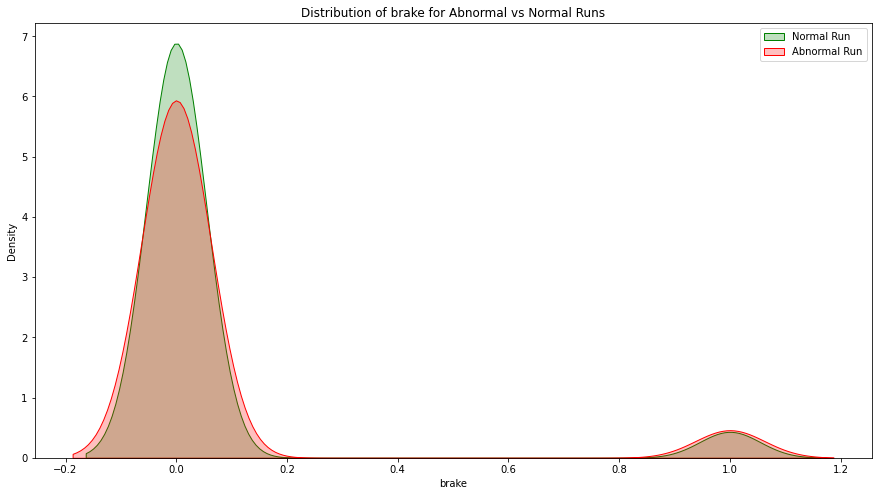

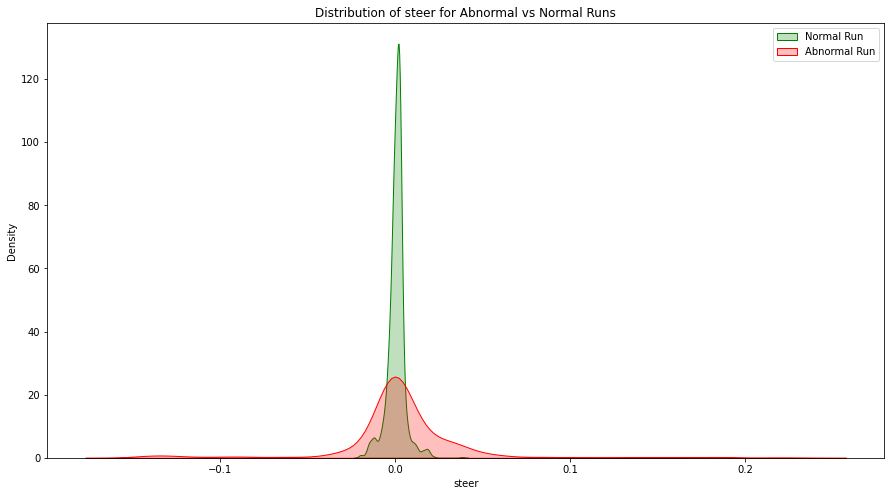

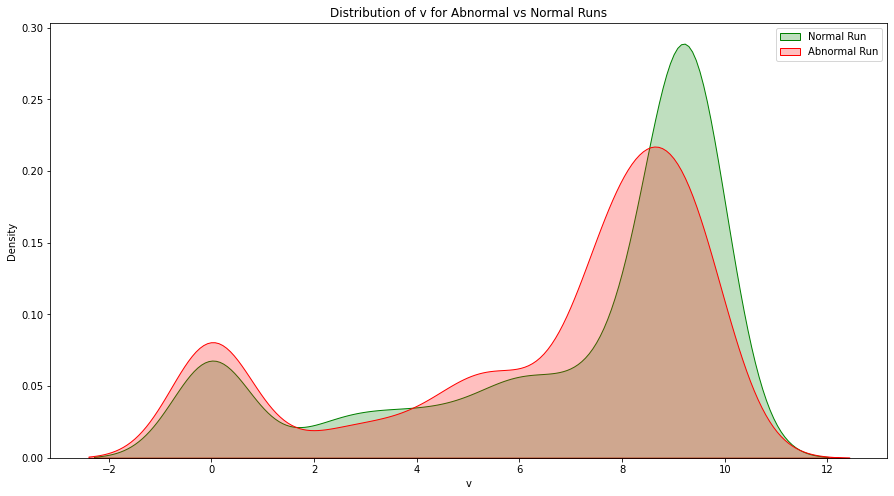

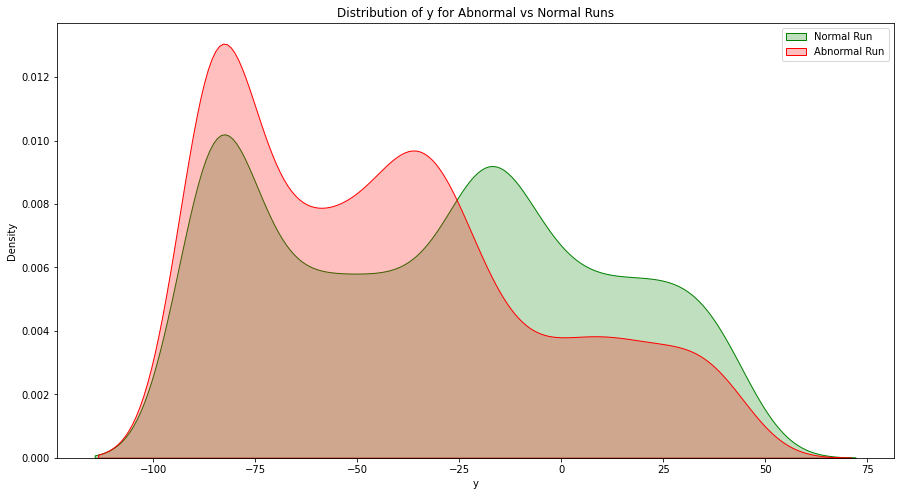

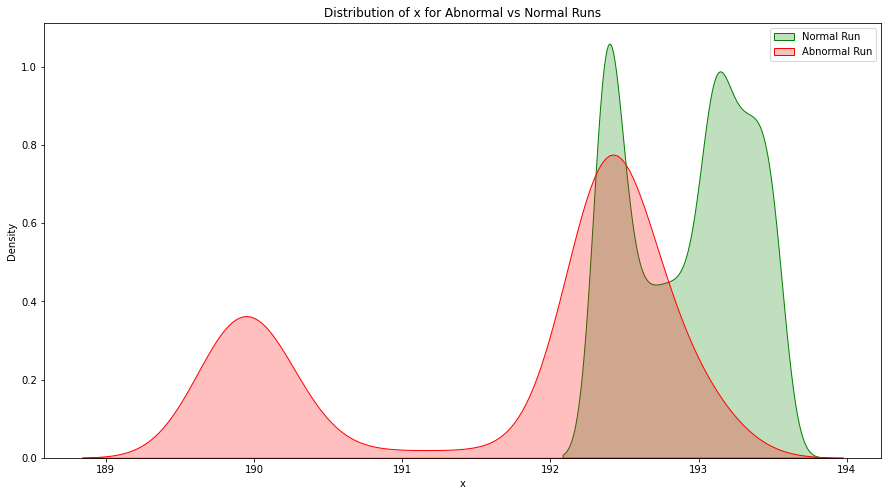

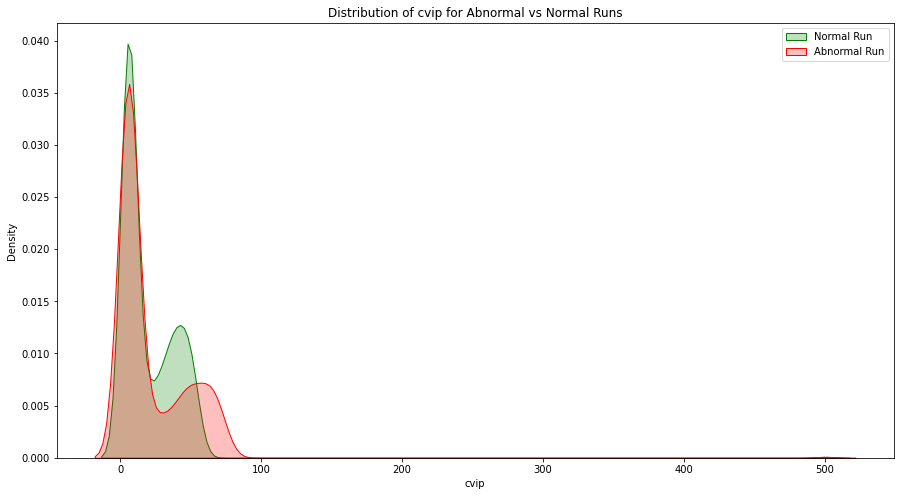

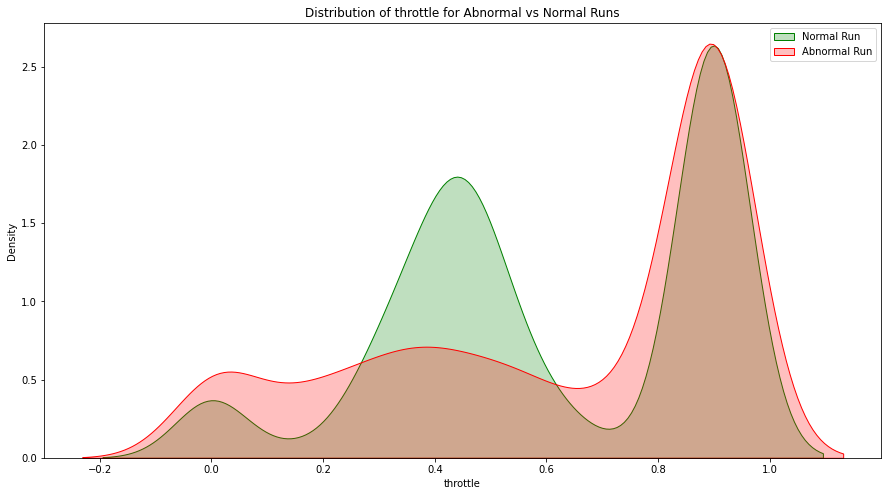

In [26]:
features = ["brake", "steer", "v", "y", "x", "cvip", "throttle"]
normal_runs = pd.concat([df_clear_noon, df_clear_sunset], axis=0).reset_index(drop=True) # Concatenate the DataFrames for clear noon and clear sunset (normal runs)conditions
abnormal_runs = pd.concat([df_clear_night, df_rain_noon], axis=0).reset_index(drop=True) # Concatenate the DataFrames for clear night and rain noon (abnormal runs) conditions

for feature in features: # Iterate over the features
    plt.figure(figsize=(15, 8)) # Set the figure size

    sns.kdeplot(normal_runs[feature], label='Normal Run', color='green', fill=True) # Plot the kernel density estimate for normal runs
    sns.kdeplot(abnormal_runs[feature], label='Abnormal Run', color='red', fill=True)  # Plot the kernel density estimate for abnormal runs
    
    plt.title(f'Distribution of {feature} for Abnormal vs Normal Runs') # Set the title of the plot
    plt.xlabel(feature) # Set the x-axis label
    plt.ylabel('Density') # Set the y-axis label
    plt.legend() # Show the legend
    
    plt.show() # Show the plot

According to the distribution of feature *steer* above, we can find that in the normal runs (**Clear Noon** and **Clear Sunset**), the distribution of the *steer* appear to have narrow and highly concentrated around zero, this indicates that the car has a stable direction with minimal deviation. This is what we expected because when we drive in a good weather condition most of time we can keep a stable route and will not change our direction frequently. However, in the abnormal runs (**Clear Night** and **Rain Noon**), we can observe that the distribution is much wider, this suggest that the steer in these cases are more varied, which indicates less stability.

#### b. 2-sample t-test on the *steer*

$H_{0}$: There is no significant difference in *steer* value between normal runs and abnormal runs

$H_{a}$: There is significant difference in *steer* value between normal runs and abnormal runs

In [27]:
normal_steer = normal_runs['steer'] # Get the 'steer' values for normal runs
abnormal_steer = abnormal_runs['steer'] # Get the 'steer' values for abnormal runs

levene_stat, levene_p = stats.levene(abnormal_steer, normal_steer) # Perform Levene's test for equal variances
print(f"Levene's test for equal variances: stat={levene_stat}, p-value={levene_p}") # Print the results of Levene's test

if levene_p > 0.05: # Check if the p-value is greater than 0.05
    t_stat, p_value = stats.ttest_ind(abnormal_steer, normal_steer, equal_var=True) # Perform t-test with equal variances
    print("Using t-test with equal variances.")
else:
    t_stat, p_value = stats.ttest_ind(abnormal_steer, normal_steer, equal_var=False) # Perform t-test with unequal variances
    print("Using t-test with unequal variances.")

print(f"T-statistic: {t_stat}, P-value: {p_value}")

Levene's test for equal variances: stat=335.6217716955679, p-value=8.705493267550273e-71
Using t-test with unequal variances.
T-statistic: 2.7092695452839544, P-value: 0.006835713411654971


In the above script, we first consult the test for equal variances using Levene's Test. Then we find that the p-value of the test is $<< 0.05$, we reject the assumption of equal variances. Thus, we use 2-sample t-test on the *steer* with **equal_var=False**, and the p-value of the test is $0.0068$, which is $<< 0.05$. Therefore, we reject the null hypothesis and suggests that there is significant difference in *steer* value between normal runs and abnormal runs.

#### c. Comparing the result from (b) and our findings in (a)

No, it does not contradict our observation in 4a.

In 4(a), we notice that in normal condtion,the *steer* is highly concentrated around zero, indicates that the driving status is stable. In abnormal condition, we notice that when the weater is **Clear Night**, it has a much wider distibution, which shows that the car change direction frequently. In **Rain Noon**, the distrbution was also concentrated around zero, showing caution during steering.

In 4(b), since the p-value is smaler than $0.05$, we reiect the nul hypothesis and confirm our observation in 4(a), conclude that there is significantly different under abnormal weather conditions.

### 2.5 Abnormal runs Analysis

#### a. Distribution plots analysis

According to the distribution plots, we think *throttle*, *steer*, *x* are better indicators.

- *Throttle*: For abnormal runs, we observe that it has a broader distribution and higher concentration close to 0. This indicates the car has less acceleration and more conservative driving behavior. This proves that car will reduce acceleration in bad weather conditions.

- *Steer*: As we proved in 2.4.

- *x*: For distribution plots of *x* in abnormal runs, we notice that the distribution is a much wider. And in normal runs it has narrower distribution. In normal driving conditions, the car usually maintain a stable position along the road. However, in abnormal runs, when abnormal behavior happens, the car may shift laterally on the road, indicate there may have a problem in the car's control, so it will show significant deviations.

#### b. Pearson correlation coefficient

Pearson correlation coefficient matrix for Normal runs:

In [28]:
cor_matrix = normal_runs[['throttle', 'steer', 'x']].corr(method='pearson') # Calculate the Pearson correlation coefficient matrix for normal runs

print("Pearson Correlation Coefficient Matrix for Normal runs:")
print(cor_matrix)

Pearson Correlation Coefficient Matrix for Normal runs:
          throttle     steer         x
throttle  1.000000 -0.259696 -0.405692
steer    -0.259696  1.000000  0.019824
x        -0.405692  0.019824  1.000000


Pearson correlation coefficient matrix for Abnormal runs:

In [29]:
cor_matrix = abnormal_runs[['throttle', 'steer', 'x']].corr(method='pearson') # Calculate the Pearson correlation coefficient matrix for abnormal runs

print("Pearson Correlation Coefficient Matrix for Abnormal runs:")
print(cor_matrix)

Pearson Correlation Coefficient Matrix for Abnormal runs:
          throttle     steer         x
throttle  1.000000  0.012694  0.047667
steer     0.012694  1.000000  0.268290
x         0.047667  0.268290  1.000000


1. *Throttle* and *Steer*:
- **Normal Runs**: The correlation is negative (-0.259), meaning as the *throttle* increases, the *steer* tends to decrease.
- **Abnormal Runs**: The correlation is close to zero (0.013), indicating that there is almost no relationship between *throttle* and *steer* during abnormal runs.

2. *Throttle* and *x*:
- **Normal Runs**: The correlation is moderately negative (-0.406), meaning that *throttle* and the variable *x* (horizontal position) tend to move in opposite directions.
- **Abnormal Runs**: The correlation is much weaker (0.048), indicating that *throttle* and *x* are less related during abnormal conditions.

3. *Steer* and *x*:
- **Normal Runs**: There is almost no correlation (0.020), suggesting *steer* and *x* are unrelated in normal conditions.
- **Abnormal Runs**: The correlation increases to 0.268, showing a positive relationship between *steer* and *x* during abnormal runs.

The correlations for *throttle*, *steer*, and *x* show significant differences between normal and abnormal runs. In normal runs, the correlations between the indicators are not very high. For instance, *throttle* has a moderate negative correlation with *steer* (-0.259) and *x* (-0.406). In abnormal runs, these correlations weaken even further. Such low correlations between indicators implies that they provide complementary information. In other words, each indicator is contributing unique insights about the behavior of the AV in different runs (normal vs. abnormal). Using all the indicators together allows a model to capture the interactions between features, which can improve predictive power, especially for detecting abnormal behaviors.

### 2.6  Kolmogorov–Smirnov two-sample test find the strongest indicator

We think indicator *x* has the strongest predictive power and below we construct hypothesis test:

$H_0$: The distributions of the *x* for normal and abnormal runs are the same.

$H_a$: The distributions of the *x* for normal and abnormal runs are different.

In [30]:
ks_stat, ks_p_value = stats.ks_2samp(normal_runs['x'], abnormal_runs['x']) # Perform Kolmogorov-Smirnov test for 'x' feature
print(f"KS-statistic for 'x': {ks_stat}, P-value: {ks_p_value}")

KS-statistic for 'x': 0.5687065619147972, P-value: 4.551914400963142e-15


According to the result, the p-value of x equals 2.221590496288456e-201 which is $<< 0.05$, so we reject the null hypothesis and conclude that distributions of the *x* for normal and abnormal runs have significant difference. Therefore, we confirm that *x* is a good indicator.

Among those un-selected indicators in Task 2.5, we choose indicator *brake* and perform hypothesis test on it: 

$H_0$: The distributions of the *brake* for normal and abnormal runs are the same.

$H_a$: The distributions of the *brake* for normal and abnormal runs are different.

In [31]:
ks_stat_brake, ks_p_value_brake = stats.ks_2samp(normal_runs['brake'], abnormal_runs['brake']) # Perform Kolmogorov-Smirnov test for 'brake' feature
print(f"KS-statistic for 'brake': {ks_stat_brake}, P-value: {ks_p_value_brake}")

KS-statistic for 'brake': 0.01278260347340893, P-value: 0.9998321947791975


According to the result, the p-value of *brake* equals to $0.9998321947791979$ which is $>> 0.05$, so we cannot reject the null hypothesis and conclude that the distributions of the *brake* for normal and abnormal runs are the same. Therefore, we can confirm that *brake* is not a good indicator.

#### Difference between KS test and t-test:

**KS test** is a non-parametric test and a way to compare the cumulative distributions of two samples to determine if they are from the same distribution. There is no assumption of normality, only checks the distribution shape.

**T-test** is a parametric test that compares the means of two groups assuming that the data follows a normal distribution. It only compares the mean of two groups.

### 2.7 Assumptions we need

When using the KS two-sample test on the distributions in Task 2.6, the key assumption we made is that each sample (data point) is independent of others. This means we assumed that the values of the feature *x* at each time step are independent and not correlated with one another. One situation where this assumption may fail is if the data points are autocorrelated (i.e., the values of a feature at one time step are dependent on the values at previous time steps). In a time-series setting, where the values at a given time might depend on earlier values, autocorrelation can occur.

### 2.8 DTW compare time-series data 

In [41]:
distance_clear_noon_clear_night = dtw.distance(df_clear_noon[['steer']].to_numpy().flatten(), df_clear_night[['steer']].to_numpy().flatten()) # Calculate the DTW distance between clear noon and clear night
distance_clear_noon_clear_sunset = dtw.distance(df_clear_noon[['steer']].to_numpy().flatten(), df_clear_sunset[['steer']].to_numpy().flatten()) # Calculate the DTW distance between clear noon and clear sunset

print(f"DTW distance between clear-noon and clear-night: {distance_clear_noon_clear_night}")
print(f"DTW distance  between clear-noon and clear-sunset: {distance_clear_noon_clear_sunset}")

DTW distance between clear-noon and clear-night: 1.1078890021972272
DTW distance between clear-noon and clear-sunset: 0.05479981578418118


The steering data for **Clear Sunset** is much more similar to **Clear Noon** compared to **Clear Night**. This suggests that the time-series patterns of steering during **Clear Sunset** simulation are closer to those during **Clear Noon** than those observed during **Clear Night**.